# **Neural Network**

> ### Mitul Agrawal

Drive Link : [PRML Lab 7 Drive](https://drive.google.com/drive/folders/1F8Bhfw3BuaI7MKLu1M8EygPI0jw_l_1B?usp=sharing)

In [ ]:
from google.colab import drive
#drive.mount('/content/drive/')

path = '/content/drive/My Drive/PRML/Lab 7/'

##Neural Network

###a) Preprocessing & Visualization 

####Importing

In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import time
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(path+'Dry_Bean_Dataset.xlsx')

df = df.sample(frac=1)
df.reset_index(drop=True, inplace=True)

print(df.shape)
df.head(4)

(13611, 17)


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,43544,774.269,286.235335,194.528238,1.471433,0.733574,44079,235.461128,0.814500,0.987863,0.912755,0.822614,0.006573,0.001857,0.676693,0.995709,SIRA
1,39845,839.384,316.963189,161.958923,1.957059,0.859598,40836,225.238162,0.808543,0.975732,0.710661,0.710613,0.007955,0.001251,0.504971,0.988258,HOROZ
2,41735,735.759,257.967017,206.218699,1.250939,0.600800,42050,230.518226,0.773988,0.992509,0.968811,0.893596,0.006181,0.002431,0.798513,0.998891,SEKER
3,38404,734.438,279.927924,175.915713,1.591262,0.777864,39072,221.127772,0.686472,0.982903,0.894697,0.789945,0.007289,0.001751,0.624014,0.992969,DERMASON


####Cleaning

In [ ]:
def remove_missing(df) : 
  remove = []
  for i, row in df.iterrows():
    if row.isna().values.any() : remove.append(i)
  df.drop(remove,axis=0,inplace=True)

def fill_missing(df) : 
  for col in df : 
    df[col].fillna((df[col].mode()), inplace=True)

def remove_mismatch(df) : 
  for col in df : 
    df.reset_index(drop=True, inplace=True)
    s = [False]*len(df[col])
    for i,cell in enumerate(df[col]) : 
      try : n = int(cell)
      except : s[i] = True
    t = s.count(True)
    f = s.count(False)
    st = False
    if(t>f) : st = True
    remove = [i for i in range(len(df[col])) if s[i]!=st]
    df.drop(remove,axis=0,inplace=True)

def fill_mismatch(df) : 
  for col in df : 
    s = [False]*len(df[col])
    for i,cell in enumerate(df[col]) : 
      try : n = int(cell)
      except : s[i] = True
    t = s.count(True)
    f = s.count(False)
    st = False
    if(t>f) : st = True
    for i in range(len(df[col])) : 
      if(s[i]!=st) : 
        try : 
          df[col][i] = df[col].median()
        except :
          df[col][i] = df[col].mode()

def str_to_num(df) : 
  for col in df : 
    try : df[col] = pd.to_numeric(df[col])
    except : pass

print("Before :",df.shape)

str_to_num(df)

fill_missing(df)

fill_mismatch(df)

str_to_num(df)

print("After  :",df.shape)

Before : (13611, 17)
After  : (13611, 17)


####Encoding & Normalizing

In [ ]:
def encode_label(df,col,order) : 
  if(order==[]) : order = list(df[col].unique())
  for i,cell in enumerate(df[col]) : 
    try : 
      df.at[i,col] = order.index(df[col][i])
    except : 
      df.at[i,col] = -1

def encode_labels(df,cols) : 
  for col in cols.keys() : 
    encode_label(df,col,cols[col])

labels = {}
labels["Class"] = []
 
encode_labels(df,labels)

str_to_num(df)

def normalize_dbl(df,cols=None,exceptions=None,round=None) : 
  if cols is None : 
    cols = df.columns
    if exceptions is not None : cols = [c for c in cols if c not in exceptions]
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    l = max(df[col])
    if round is None : df[col] = df[col].div(l)
    else : df[col] = df[col].div(l).round(round)

def standardize(df,cols=None,exceptions=None) : 
  if cols is None : 
    cols = df.columns
    if exceptions is not None : cols = [c for c in cols if c not in exceptions]
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    mn = df[col].mean()
    std = df[col].std()
    df[col] = df[col].subtract(mn)
    df[col] = df[col].div(std)

normalize_dbl(df,exceptions="Class")

#standardize(df,exceptions="Class")

df.head(4)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.171018,0.389987,0.387401,0.422705,0.605452,0.804867,0.167435,0.413544,0.940320,0.993149,0.921337,0.833193,0.628970,0.506627,0.694210,0.995976,0
1,0.156491,0.422785,0.428989,0.351933,0.805273,0.943138,0.155116,0.395589,0.933443,0.980953,0.717342,0.719752,0.761150,0.341410,0.518043,0.988522,1
2,0.163914,0.370590,0.349142,0.448108,0.514725,0.659189,0.159727,0.404862,0.893550,0.997820,0.977920,0.905088,0.591424,0.663342,0.819184,0.999159,2
3,0.150831,0.369925,0.378865,0.382261,0.654758,0.853461,0.148415,0.388370,0.792515,0.988163,0.903109,0.800104,0.697437,0.477713,0.640167,0.993235,3


####Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

def train_val_test(x,y,train_size=-1,val_size=-1,test_size=-1) : 

  if(train_size==-1) : train_size = 1-val_size-test_size
  if(val_size==-1) : val_size = 1-train_size-test_size
  if(test_size==-1) : test_size = 1-train_size-val_size

  x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=train_size,stratify=y,random_state=42)

  x_val,x_test,y_val,y_test = train_test_split(x_val,y_val,train_size=(val_size/(1-train_size)),stratify=y_val,random_state=42)

  return x_train,x_val,x_test,y_train,y_val,y_test

x_train,x_val,x_test,y_train,y_val,y_test = train_val_test(x,y,train_size=0.75,val_size=0.1)  

x_train.reset_index(drop=True, inplace=True)
x_val.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# To Numpy Array 
# x_train=x_train.values
# y_train=y_train.values
# x_val=x_val.values
# y_val=y_val.values
# x_test=x_test.values
# y_test=y_test.values 

print("Train Data         :",x_train.shape)
print("Train Labels       :",y_train.shape)
print()
print("Validation Data    :",x_val.shape)
print("Validation Labels  :",y_val.shape)
print()
print("Test Data          :",x_test.shape)
print("Test Labels        :",y_test.shape)

Train Data         : (10208, 16)
Train Labels       : (10208,)

Validation Data    : (1361, 16)
Validation Labels  : (1361,)

Test Data          : (2042, 16)
Test Labels        : (2042,)


####Visualization

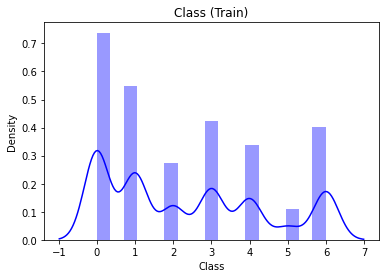

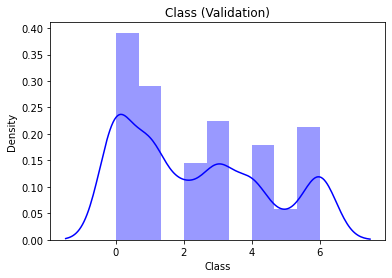

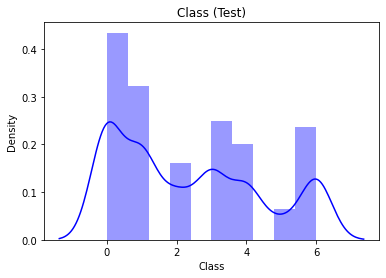

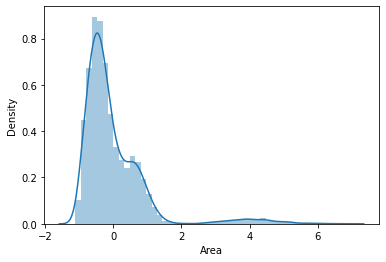

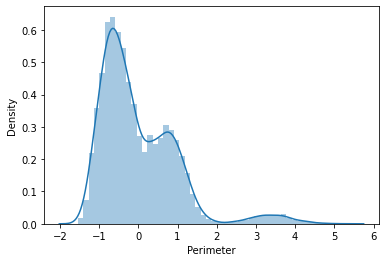

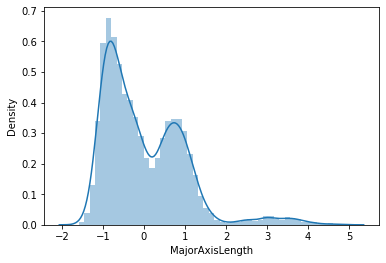

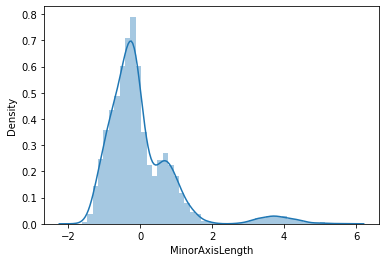

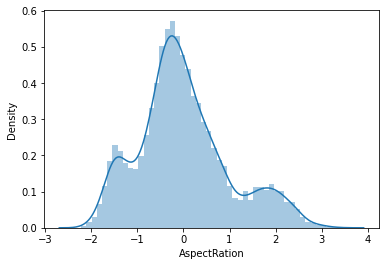

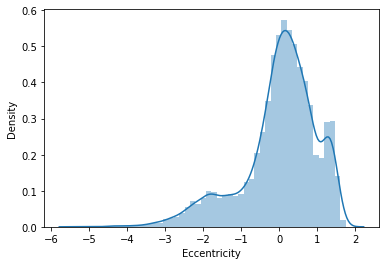

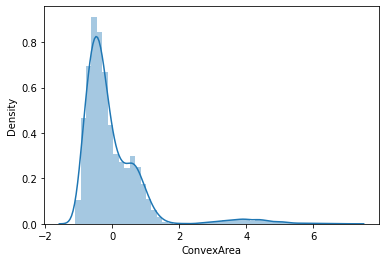

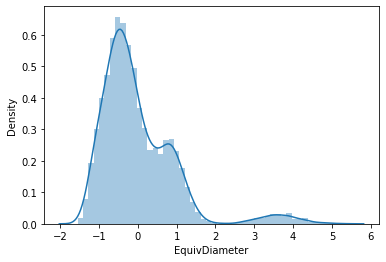

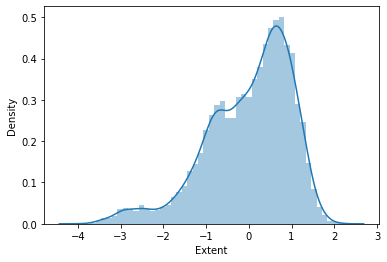

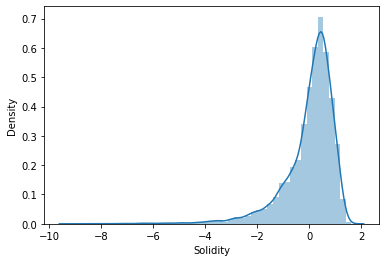

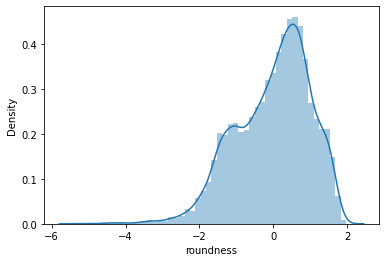

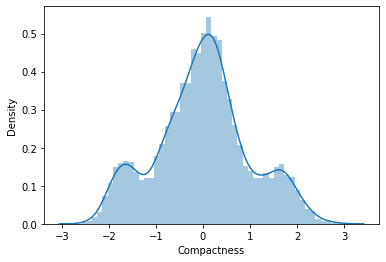

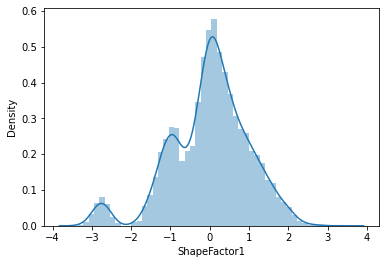

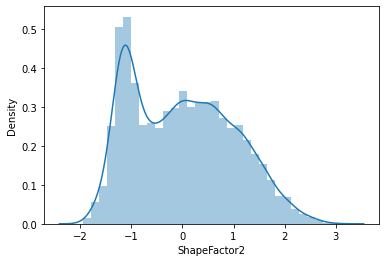

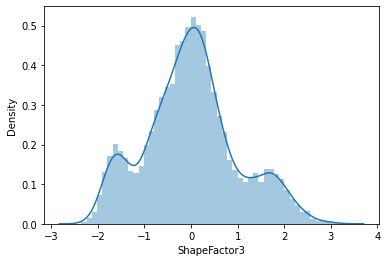

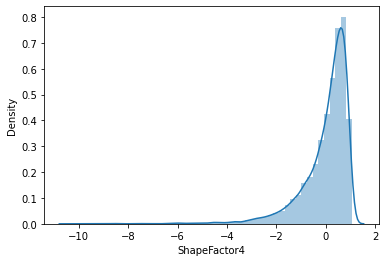

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sb

sb.distplot(y_train,color='b').set_title(f"Class (Train)")
plt.show()

sb.distplot(y_val,color='b').set_title(f"Class (Validation)")
plt.show()

sb.distplot(y_test,color='b').set_title(f"Class (Test)")
plt.show()

xlen = x_train.shape[1]
for i in range(xlen) : 
  sb.distplot(x_train.iloc[:,i])
  plt.show()

###b) Multi-Layer Perceptron (Scratch)

In [ ]:
import math
import random

def dot(l1,l2) : 
  return sum([l1[i]*l2[i] for i in range(len(l1))]) 

# Activation ==================

class Activation : 

  def __init__(self) : 
    pass

  def Sigmoid(self,values) : 
    for i,a in enumerate(values) : 
      values[i] = 1/(1+math.exp((-1)*a))
    return values

  def TanH(self,values) : 
    for i,a in enumerate(values) :
      x = math.exp(2*a)
      values[i] = (x-1)/(x+1)
    return values

  def ReLU(self,values) : 
    for i,a in enumerate(values) : 
      if(a<0) : values[i] = 0 
    return values

  def Softmax(self,values) :
    for i,a in enumerate(values) : 
      values[i] = math.exp(a)
    s = sum(values)
    return [a/s for a in values]

  def Linear(self,values) : 
    return values

  def d_Sigmoid(self,value) : 
    e = math.exp((-1)*value)
    return e/((1+e)**2)

  def d_TanH(self,value) : 
    e = math.exp(2*value)
    return (4*e)/((e+1)**2)

  def d_ReLU(self,value) : 
    if(value<0) : return 0
    return 1

  def d_Softmax(self,value,values) : 
    print(values)
    for i,a in enumerate(values) : 
      values[i] = math.exp(a)
    s = sum(values)
    e = math.exp(value)
    d = (e*(s-e))/(s**2)
    return d

  def d_Linear(self,value) : 
    return 1

#==============================


# Loss  =======================

class Loss : 

  def __init__(self) : 
    pass

  def MSE(self,y,m) : 
    sum = 0
    n = len(y)
    for i in range(n) : 
      sum = sum + (y[i]-m[i])**2
    sum = sum/n
    return sum

  def d_MSE(self,y,m) :
    n = len(y)
    for i in range(n) : 
      y[i] = 2*(m[i]-y[i])/n
    return y

#==============================


# Layer  =======================

class Layer :

  def __init__(self,neurons=1,activation="Sigmoid") : 
    self.neurons = neurons
    self.values = []
    self.activation = activation
    self.prevalues = []

  def activate(self,values) : 
    if(self.activation=="Sigmoid") : return Activation().Sigmoid(values)
    if(self.activation=="TanH") : return Activation().TanH(values)
    if(self.activation=="ReLU") : return Activation().ReLU(values)
    if(self.activation=="Softmax") : return Activation().Softmax(values)
    if(self.activation=="Linear") : return Activation().Linear(values)

  def d_activation(self,value,values=None) :
    if(self.activation=="Sigmoid") : return Activation().d_Sigmoid(value)
    if(self.activation=="TanH") : return Activation().d_TanH(value)
    if(self.activation=="ReLU") : return Activation().d_ReLU(value)
    if(self.activation=="Softmax") : return Activation().d_Softmax(value,values)
    if(self.activation=="Linear") : return Activation().d_Linear(value)

  def d_loss(self,y,m,loss) : 
    if(loss=="MSE") : return Loss().d_MSE(y,m)

#==============================


# Weights Initialization  =====

class Weights : 

  def _init_(self) : 
    pass

  def initialize(self,weight_init,layers,min=None,max=None,c=None) : 
    if(weight_init=="Random") : return self.random(layers,min,max)
    if(weight_init=="Zero") : return self.zero(layers)
    if(weight_init=="Constant") : return self.constant(layers,c)

  def zero(self,layers) : 
    weights = []
    for i in range(len(layers)-1) : 
      weights.append([[0]*layers[i+1].neurons]*layers[i].neurons)
    return weights
  
  def random(self,layers,min=0,max=1) : 
    weights = []
    for i in range(len(layers)-1) : 
      weights.append([[random.uniform(min,max) for k in range(layers[i+1].neurons)] for j in range(layers[i].neurons)])
    return weights    

  def constant(self,layers,c=1) : 
    weights = []
    for i in range(len(layers)-1) : 
      weights.append([[c]*layers[i+1].neurons]*layers[i].neurons)
    return weights  

#==============================


# MultiLayerPerceptron  =======

class MultiLayerPerceptron :

  def __init__(self,layers,epochs=1,lr=0.01,loss="MSE",weight_init="Zero",weight_min=0,weight_max=1,weight_constant=1) : 
    self.loss = loss
    self.layers = layers
    self.weights = Weights().initialize(weight_init,layers,weight_min,weight_max,weight_constant) 
    self.bias = [[0]*(layers[i].neurons) for i in range(1,len(layers))]
    self.lr = lr
    self.epochs = epochs

  def forward(self,input) :
    if(len(input)!=self.layers[0].neurons) : print("Error during Forward Propagation")
    self.layers[0].values = input
    for i in range(1,len(self.layers)) : 
      self.layers[i].prevalues = [dot(self.layers[i-1].values,[self.weights[i-1][k][j] for k in range(len(self.weights[i-1]))])+self.bias[i-1][j] for j in range(self.layers[i].neurons)]
      self.layers[i].values = self.layers[i].activate(self.layers[i].prevalues)
    return self.layers[-1].values

  def backward(self,Y) : 
    gradients = [[0]*(self.layers[i].neurons) for i in range(0,len(self.layers))]
    gradients_w = Weights().zero(self.layers)
    gradients_b = [[0]*(self.layers[i].neurons) for i in range(1,len(self.layers))]
    gradients[-1] = self.layers[-1].d_loss(Y,self.layers[-1].values,self.loss)

    for i in range(len(gradients)-2,0,-1) : 
      for j in range(self.layers[i].neurons) :
        for k in range(self.layers[i+1].neurons) :
          gradients[i][j] = gradients[i][j] + (gradients[i+1][k] * self.layers[i+1].d_activation(self.layers[i+1].prevalues[k],self.layers[i+1].prevalues) * self.weights[i][j][k])

    for i in range(len(gradients_w)) : 
      for j in range(len(gradients_w[i])) : 
        for k in range(len(gradients_w[i][j])) : 
          gradients_w[i][j][k] = gradients[i+1][k] * self.layers[i+1].d_activation(self.layers[i+1].prevalues[k],self.layers[i+1].prevalues) * self.layers[i].values[j]
        
    for i in range(len(gradients_b)) : 
      for j in range(len(gradients_b[i])) :   
        gradients_b[i][j] = gradients[i+1][j] * self.layers[i+1].d_activation(self.layers[i+1].prevalues[j],self.layers[i+1].prevalues) 

    return (gradients_w,gradients_b)

  def update_weights(self,gradients_w,gradients_b) :
    for i in range(len(gradients_w)) : 
      for j in range(len(gradients_w[i])) : 
        for k in range(len(gradients_w[i][j])) : 
          self.weights[i][j][k] = self.weights[i][j][k] - self.lr * gradients_w[i][j][k]
    for i in range(len(gradients_b)) : 
      for j in range(len(gradients_b[i])) :   
        self.bias[i][j] = self.bias[i][j] - self.lr * gradients_b[i][j] 
  
  def train_step(self,x,y) : 
    output = self.forward(list(x))
    Y = [0]*self.layers[-1].neurons
    Y[y] = 1
    loss = Loss().MSE(output,Y)
    gradients_w,gradients_b = self.backward(Y)
    self.update_weights(gradients_w,gradients_b)
    return loss

  def train_whole(self,X,Yt) : 
    loss = 0
    n = X.shape[0]
    Gradients_w = None
    Gradients_b = None
    for i,x in X.iterrows() :
      output = self.forward(list(x))
      Y = [0]*self.layers[-1].neurons
      Y[Yt[i]] = 1
      loss = loss + Loss().MSE(output,Y)
      gradients_w,gradients_b = self.backward(Y)
      if(Gradients_w is None) : Gradients_w,Gradients_b = gradients_w,gradients_b
      else : 
        for a in range(len(Gradients_w)) : 
          for b in range(len(Gradients_w[a])) : 
            for c in range(len(Gradients_w[a][b])) : 
              Gradients_w[a][b][c]  = Gradients_w[a][b][c]  + gradients_w[a][b][c] 
        for a in range(len(Gradients_b)) : 
          for b in range(len(Gradients_b[a])) :  
            Gradients_b[a][b]  = Gradients_b[a][b]  + gradients_b[a][b] 

    for a in range(len(Gradients_w)) : 
      for b in range(len(Gradients_w[a])) : 
        for c in range(len(Gradients_w[a][b])) : 
          Gradients_w[a][b][c]  = Gradients_w[a][b][c]/n 
    for a in range(len(Gradients_b)) : 
      for b in range(len(Gradients_b[a])) :  
        Gradients_b[a][b]  = Gradients_b[a][b]/n 

    self.update_weights(gradients_w,gradients_b)
    return loss/n

  def predict(self,X) :
    Y = [0]*len(X)
    for i,x in X.iterrows() : 
      output = self.forward(list(x))
      y = 0
      for j in range(len(output)) : 
        if(output[j]>output[y]) : y = j
      Y[i] = y
    return Y

  def accuracy(self,y,yp) : 
    n = len(y) 
    acc = sum([y[i]==yp[i] for i in range(n)])
    return 100*acc/n

  def evaluate(self,x,y) :
    return self.accuracy(y,self.predict(x))

  def train(self,X,Y,X_val,Y_val,plot=False,sm=1) :
    Xt = X.copy()
    Yt = Y.copy()
    stats = Xt.shape[0]-1
    if(plot) :
      stats = (Xt.shape[0]-1)//sm
      Epochs_p = []
      Train_Acc_p = []
      Val_Acc_p = []
      Loss_p = []
    acc_t = self.evaluate(Xt,Yt)
    acc_val = self.evaluate(X_val,Y_val)
    print('Before Training (Random or Same Prediction) : Train Accuracy: %.2f | Validation Accuracy: %.2f\n' \
            %(acc_t,acc_val))
    for epoch in range(self.epochs) : 
      Loss = 0
      c = 0
      d = 0
      for i,x in Xt.iterrows() :
        Loss = Loss + self.train_step(x,Yt[i])
        c = c + 1
        if(c%stats==0) : 
          acc_t = self.evaluate(Xt,Yt)
          acc_val = self.evaluate(X_val,Y_val)
          if((d==sm-1)) : 
            print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f | Validation Accuracy: %.2f' \
                  %(epoch+1,Loss/Xt.shape[0],acc_t,acc_val))
          c = 0
          d = d+1
          if(plot) : 
            Epochs_p.append(d*(epoch+1)/sm)
            Train_Acc_p.append(acc_t)
            Val_Acc_p.append(acc_val)
            Loss_p.append(Loss*sm/Xt.shape[0])
    if(plot) :
      plt.plot(Epochs_p,Train_Acc_p)
      plt.plot(Epochs_p,Val_Acc_p)
      plt.legend(["Training Accuracy","Validation Accuracy"])
      plt.title("Accuracy")
      plt.show()
      plt.plot(Epochs_p,Loss_p)
      plt.title("Training Loss")
      plt.show() 
          
         
#==============================
# Mitul Agrawal © 
#==============================

Before Training (Random or Same Prediction) : Train Accuracy: 14.89 | Validation Accuracy: 14.92

Epoch: 1 | Loss: 0.1597 | Train Accuracy: 30.66 | Validation Accuracy: 29.32
Epoch: 2 | Loss: 0.1137 | Train Accuracy: 38.02 | Validation Accuracy: 37.11
Epoch: 3 | Loss: 0.1089 | Train Accuracy: 39.08 | Validation Accuracy: 38.35
Epoch: 4 | Loss: 0.1083 | Train Accuracy: 39.91 | Validation Accuracy: 39.31
Epoch: 5 | Loss: 0.1078 | Train Accuracy: 40.88 | Validation Accuracy: 40.56
Epoch: 6 | Loss: 0.1072 | Train Accuracy: 41.79 | Validation Accuracy: 41.07
Epoch: 7 | Loss: 0.1066 | Train Accuracy: 42.37 | Validation Accuracy: 41.44
Epoch: 8 | Loss: 0.1057 | Train Accuracy: 43.24 | Validation Accuracy: 41.95
Epoch: 9 | Loss: 0.1047 | Train Accuracy: 44.43 | Validation Accuracy: 43.64
Epoch: 10 | Loss: 0.1047 | Train Accuracy: 45.56 | Validation Accuracy: 44.82
Epoch: 11 | Loss: 0.1061 | Train Accuracy: 46.82 | Validation Accuracy: 46.07
Epoch: 12 | Loss: 0.1080 | Train Accuracy: 47.75 | Va

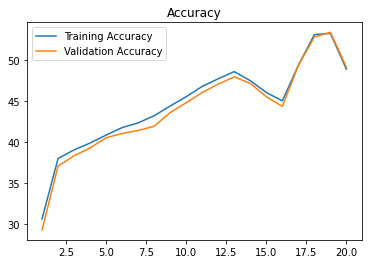

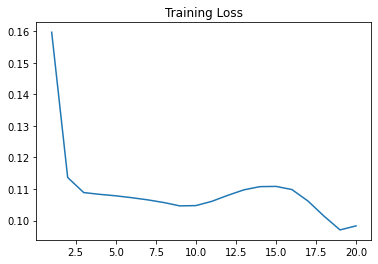



Test Accuracy : 47.94319294809011


In [ ]:
features = x_train.shape[1]
classes = len(y_train.unique())

mlp = MultiLayerPerceptron(layers=[Layer(features),
                                   Layer(8),
                                   Layer(classes)],
                           epochs=20,lr=0.01,weight_init="Random",weight_min=-10,weight_max=10)

mlp.train(x_train,y_train,x_val,y_val,plot=True)

print("\n\nTest Accuracy :",mlp.evaluate(x_test,y_test))

###c) Different Activation Functions

Sigmoid -

Before Training (Random or Same Prediction) : Train Accuracy: 12.33 | Validation Accuracy: 12.27

Epoch: 1 | Loss: 0.1148 | Train Accuracy: 35.74 | Validation Accuracy: 34.75
Epoch: 2 | Loss: 0.1041 | Train Accuracy: 39.18 | Validation Accuracy: 38.94
Epoch: 3 | Loss: 0.1036 | Train Accuracy: 40.10 | Validation Accuracy: 40.41
Epoch: 4 | Loss: 0.1009 | Train Accuracy: 42.96 | Validation Accuracy: 43.57
Epoch: 5 | Loss: 0.1004 | Train Accuracy: 43.02 | Validation Accuracy: 43.42


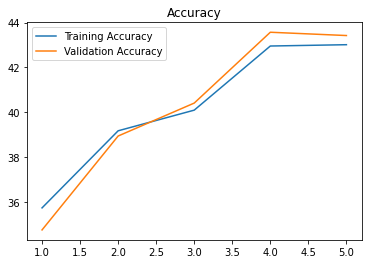

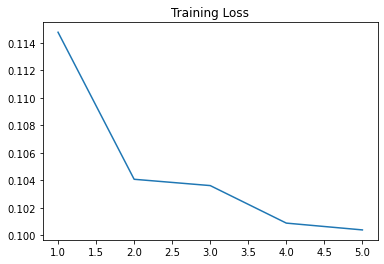


TanH -

Before Training (Random or Same Prediction) : Train Accuracy: 19.37 | Validation Accuracy: 19.32

Epoch: 1 | Loss: 0.3882 | Train Accuracy: 25.98 | Validation Accuracy: 25.79
Epoch: 2 | Loss: 0.1221 | Train Accuracy: 25.98 | Validation Accuracy: 25.79
Epoch: 3 | Loss: 0.1221 | Train Accuracy: 25.98 | Validation Accuracy: 25.86
Epoch: 4 | Loss: 0.1221 | Train Accuracy: 25.99 | Validation Accuracy: 25.86
Epoch: 5 | Loss: 0.1221 | Train Accuracy: 25.99 | Validation Accuracy: 25.86


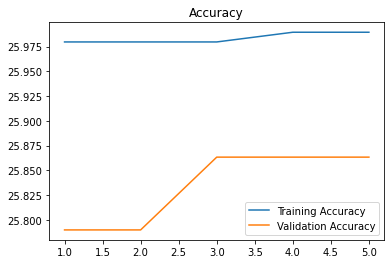

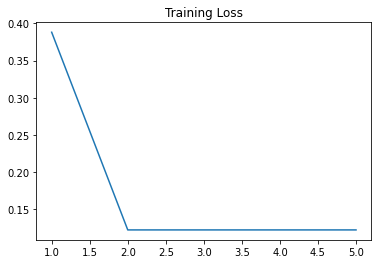


ReLU -

Before Training (Random or Same Prediction) : Train Accuracy: 15.64 | Validation Accuracy: 15.58

Epoch: 1 | Loss: 26402297.1736 | Train Accuracy: 19.37 | Validation Accuracy: 19.32
Epoch: 2 | Loss: 0.1230 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 3 | Loss: 0.1210 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 4 | Loss: 0.1210 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 5 | Loss: 0.1210 | Train Accuracy: 26.05 | Validation Accuracy: 26.08


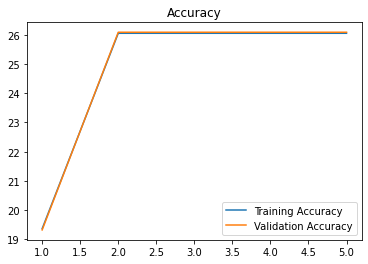

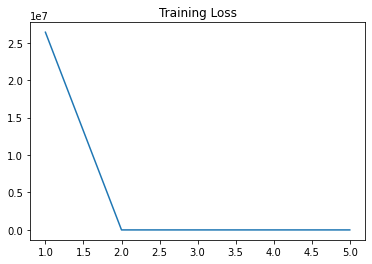




Testing Accuracy :

Sigmoid - 43.09500489715965 %
TanH    - 23.408423114593536 %
ReLU    - 26.05288932419197 %


In [ ]:
# All the three activation functions have been written from scratch above

MLP_Sigmoid = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(5,"Sigmoid"),
                                     Layer(classes,"Sigmoid")],
                             epochs=5,lr=0.1,weight_init="Random",weight_min=-10,weight_max=10)

MLP_TanH = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(5,"TanH"),
                                     Layer(classes,"TanH")],
                             epochs=5,lr=0.1,weight_init="Random",weight_min=-10,weight_max=10)

MLP_ReLU = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(5,"ReLU"),
                                     Layer(classes,"ReLU")],
                             epochs=5,lr=0.1,weight_init="Random",weight_min=-10,weight_max=10)


print("Sigmoid -\n")
MLP_Sigmoid.train(x_train,y_train,x_val,y_val,plot=True)

print("\nTanH -\n")
MLP_TanH.train(x_train,y_train,x_val,y_val,plot=True,)

print("\nReLU -\n")
MLP_ReLU.train(x_train,y_train,x_val,y_val,plot=True)

print("\n\n\nTesting Accuracy :\n")

print("Sigmoid -",MLP_Sigmoid.evaluate(x_test,y_test),"%")
print("TanH    -",MLP_TanH.evaluate(x_test,y_test),"%")
print("ReLU    -",MLP_ReLU.evaluate(x_test,y_test),"%")

###d) Different Weight Initialization

Initial Random Weights -

Before Training (Random or Same Prediction) : Train Accuracy: 11.97 | Validation Accuracy: 11.98

Epoch: 1 | Loss: 0.1477 | Train Accuracy: 39.04 | Validation Accuracy: 38.43
Epoch: 2 | Loss: 0.1194 | Train Accuracy: 42.64 | Validation Accuracy: 42.62
Epoch: 3 | Loss: 0.1105 | Train Accuracy: 44.32 | Validation Accuracy: 44.60
Epoch: 4 | Loss: 0.1039 | Train Accuracy: 44.42 | Validation Accuracy: 44.75
Epoch: 5 | Loss: 0.0997 | Train Accuracy: 43.84 | Validation Accuracy: 44.23


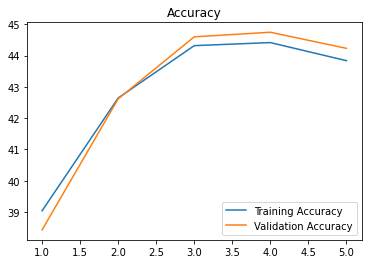

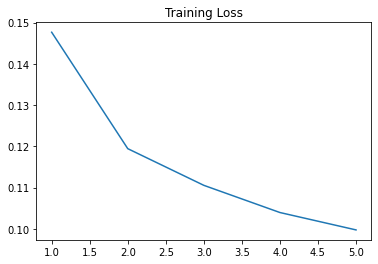


Initial Zero Weights -

Before Training (Random or Same Prediction) : Train Accuracy: 19.37 | Validation Accuracy: 19.32

Epoch: 1 | Loss: 0.1193 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 2 | Loss: 0.1185 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 3 | Loss: 0.1184 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 4 | Loss: 0.1184 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 5 | Loss: 0.1184 | Train Accuracy: 26.05 | Validation Accuracy: 26.08


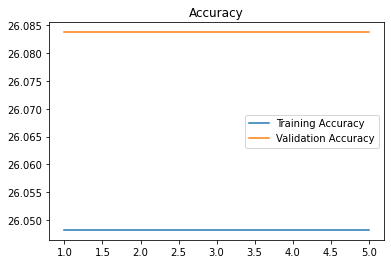

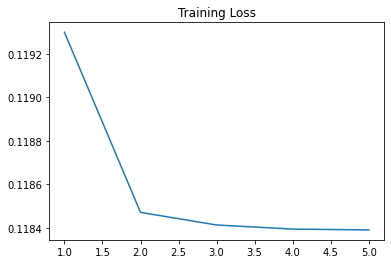


Initial Constant Weights -

Before Training (Random or Same Prediction) : Train Accuracy: 19.37 | Validation Accuracy: 19.32

Epoch: 1 | Loss: 0.1275 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 2 | Loss: 0.1182 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 3 | Loss: 0.1182 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 4 | Loss: 0.1182 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 5 | Loss: 0.1182 | Train Accuracy: 26.05 | Validation Accuracy: 26.08


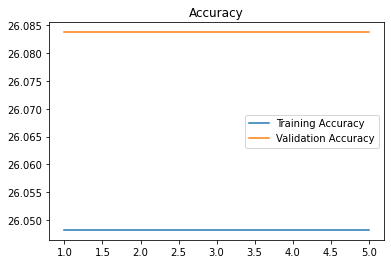

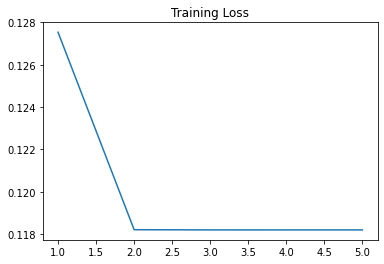




Testing Accuracy :

Random   - 43.780607247796276 %
Zero     - 26.05288932419197 %
Constant - 26.05288932419197 %


In [ ]:
# All the three weight initializations have been written from scratch above

MLP_Random = MultiLayerPerceptron(layers=[
                                     Layer(features,"Linear"),
                                     Layer(5),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Random",weight_min=-10,weight_max=10)

MLP_Zero = MultiLayerPerceptron(layers=[
                                     Layer(features,"Linear"),
                                     Layer(5),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Zero")


MLP_Constant = MultiLayerPerceptron(layers=[
                                     Layer(features,"Linear"),
                                     Layer(5),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Constant",weight_constant=0.5)

print("Initial Random Weights -\n")
MLP_Random.train(x_train,y_train,x_val,y_val,plot=True)

print("\nInitial Zero Weights -\n")
MLP_Zero.train(x_train,y_train,x_val,y_val,plot=True)

print("\nInitial Constant Weights -\n")
MLP_Constant.train(x_train,y_train,x_val,y_val,plot=True)

print("\n\n\nTesting Accuracy :\n")

print("Random   -",MLP_Random.evaluate(x_test,y_test),"%")
print("Zero     -",MLP_Zero.evaluate(x_test,y_test),"%")
print("Constant -",MLP_Constant.evaluate(x_test,y_test),"%")

###e) Different Hidden Nodes

No Hidden Layer -

Before Training (Random or Same Prediction) : Train Accuracy: 13.24 | Validation Accuracy: 12.86

Epoch: 1 | Loss: 0.1596 | Train Accuracy: 26.66 | Validation Accuracy: 26.60
Epoch: 2 | Loss: 0.1347 | Train Accuracy: 26.66 | Validation Accuracy: 26.60
Epoch: 3 | Loss: 0.1347 | Train Accuracy: 26.66 | Validation Accuracy: 26.52
Epoch: 4 | Loss: 0.1347 | Train Accuracy: 26.66 | Validation Accuracy: 26.52
Epoch: 5 | Loss: 0.1347 | Train Accuracy: 26.66 | Validation Accuracy: 26.52


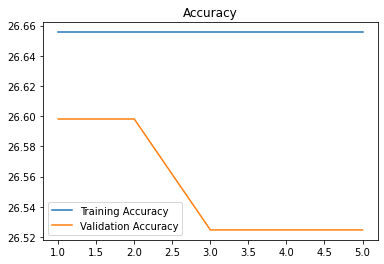

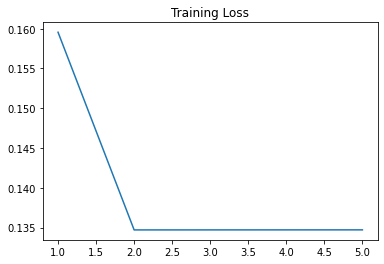


Hidden 1 : 5 Neurons -

Before Training (Random or Same Prediction) : Train Accuracy: 11.97 | Validation Accuracy: 11.98

Epoch: 1 | Loss: 0.1301 | Train Accuracy: 33.24 | Validation Accuracy: 34.02
Epoch: 2 | Loss: 0.1139 | Train Accuracy: 33.28 | Validation Accuracy: 33.73
Epoch: 3 | Loss: 0.1134 | Train Accuracy: 33.27 | Validation Accuracy: 33.65
Epoch: 4 | Loss: 0.1130 | Train Accuracy: 33.35 | Validation Accuracy: 33.87
Epoch: 5 | Loss: 0.1126 | Train Accuracy: 33.36 | Validation Accuracy: 34.17


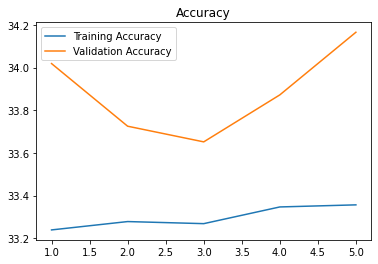

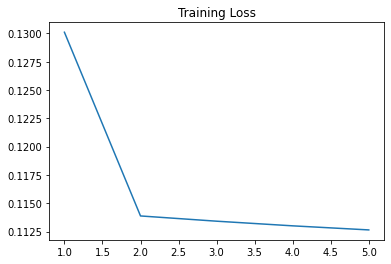


Hidden 1 : 25 Neurons -

Before Training (Random or Same Prediction) : Train Accuracy: 14.17 | Validation Accuracy: 14.18

Epoch: 1 | Loss: 0.1491 | Train Accuracy: 41.36 | Validation Accuracy: 42.17
Epoch: 2 | Loss: 0.1445 | Train Accuracy: 21.88 | Validation Accuracy: 22.48
Epoch: 3 | Loss: 0.1225 | Train Accuracy: 39.25 | Validation Accuracy: 39.90
Epoch: 4 | Loss: 0.1086 | Train Accuracy: 37.12 | Validation Accuracy: 36.52
Epoch: 5 | Loss: 0.1036 | Train Accuracy: 38.86 | Validation Accuracy: 38.13


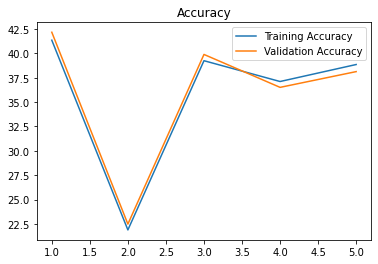

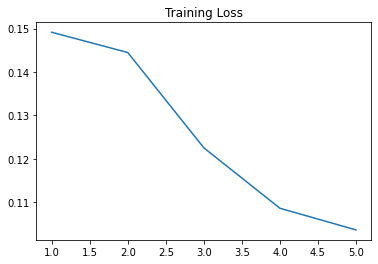


Hidden 1 : 5 Neurons | Hidden 2 : 5 Neurons -

Before Training (Random or Same Prediction) : Train Accuracy: 14.17 | Validation Accuracy: 14.18

Epoch: 1 | Loss: 0.1390 | Train Accuracy: 34.40 | Validation Accuracy: 34.17
Epoch: 2 | Loss: 0.1272 | Train Accuracy: 37.66 | Validation Accuracy: 37.03
Epoch: 3 | Loss: 0.1182 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 4 | Loss: 0.1178 | Train Accuracy: 26.05 | Validation Accuracy: 26.08
Epoch: 5 | Loss: 0.1179 | Train Accuracy: 26.05 | Validation Accuracy: 26.08


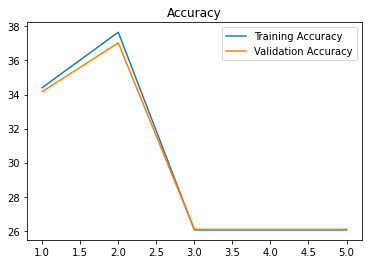

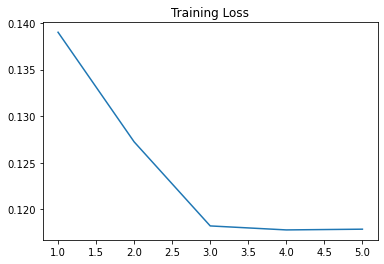


Hidden 1 : 5 Neurons | Hidden 2 : 5 Neurons | Hidden 3 : 5 Neurons -

Before Training (Random or Same Prediction) : Train Accuracy: 26.05 | Validation Accuracy: 26.08

Epoch: 1 | Loss: 0.1350 | Train Accuracy: 32.72 | Validation Accuracy: 30.57
Epoch: 2 | Loss: 0.1266 | Train Accuracy: 30.12 | Validation Accuracy: 29.61
Epoch: 3 | Loss: 0.1246 | Train Accuracy: 26.79 | Validation Accuracy: 26.30
Epoch: 4 | Loss: 0.1212 | Train Accuracy: 26.25 | Validation Accuracy: 26.01
Epoch: 5 | Loss: 0.1206 | Train Accuracy: 25.70 | Validation Accuracy: 25.50


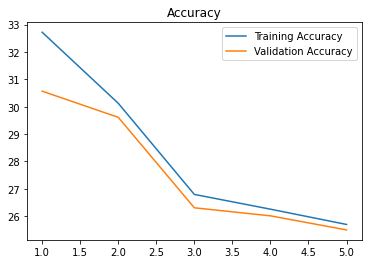

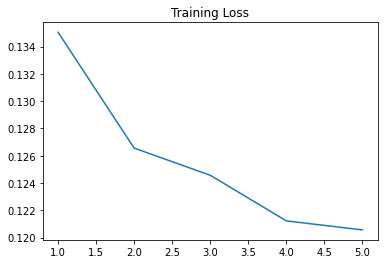




Testing Accuracy :

->          - 26.297747306562194 %
->5->       - 32.85994123408423 %
->25->      - 37.51224289911851 %
->5->5->    - 26.05288932419197 %
->5->5->5-> - 25.56317335945152 %


In [ ]:
# All the three weight initializations have been written from scratch above

MLP_0 = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Random",weight_min=-10,weight_max=10)

MLP_5 = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(5),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Random",weight_min=-10,weight_max=10)

MLP_25 = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(25),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Random",weight_min=-10,weight_max=10)

MLP_5_5 = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(5),
                                     Layer(5),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Random",weight_min=-10,weight_max=10)

MLP_5_5_5 = MultiLayerPerceptron(layers=[
                                     Layer(features),
                                     Layer(5),
                                     Layer(5),
                                     Layer(5),
                                     Layer(classes)],
                             epochs=5,lr=0.05,weight_init="Random",weight_min=-10,weight_max=10)

print("No Hidden Layer -\n")
MLP_0.train(x_train,y_train,x_val,y_val,plot=True)

print("\nHidden 1 : 5 Neurons -\n")
MLP_5.train(x_train,y_train,x_val,y_val,plot=True)

print("\nHidden 1 : 25 Neurons -\n")
MLP_25.train(x_train,y_train,x_val,y_val,plot=True)

print("\nHidden 1 : 5 Neurons | Hidden 2 : 5 Neurons -\n")
MLP_5_5.train(x_train,y_train,x_val,y_val,plot=True)

print("\nHidden 1 : 5 Neurons | Hidden 2 : 5 Neurons | Hidden 3 : 5 Neurons -\n")
MLP_5_5_5.train(x_train,y_train,x_val,y_val,plot=True)

print("\n\n\nTesting Accuracy :\n")

print("->          -",MLP_0.evaluate(x_test,y_test),"%")
print("->5->       -",MLP_5.evaluate(x_test,y_test),"%")
print("->25->      -",MLP_25.evaluate(x_test,y_test),"%")
print("->5->5->    -",MLP_5_5.evaluate(x_test,y_test),"%")
print("->5->5->5-> -",MLP_5_5_5.evaluate(x_test,y_test),"%")

###f) Save / Load Weights in MLP

In [ ]:
import pickle

def save(mlp,filename="mlp.pkl") : 
  with open(filename,'wb') as f: pickle.dump(mlp,f,pickle.HIGHEST_PROTOCOL)

def load(filename="mlp.pkl") : 
  with open(filename,'rb') as f : mlp_saved = pickle.load(f)
  return mlp_saved

print("Model to Save -",sum(mlp.weights[-1][-1]))

save(mlp)

mlp2 = load()

print("Loaded Model  -",sum(mlp.weights[-1][-1]))

Model to Save - 24.29296084139103
Loaded Model  - 24.29296084139103
